<a href="https://colab.research.google.com/github/owl1753/A.I_sojon/blob/main/20210806_A.I_sojon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
from pandas import DataFrame

In [ ]:
def create_data_with_total_size(total_size=100, train_ratio=0.8):
  x, y = make_moons(n_samples=total_size, noise=0.2, random_state=1)

  df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
  colors = {0:'red', 1:'blue'}
  fig, ax = pyplot.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  pyplot.show()

  split_index = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

In [ ]:
def show_overfitting(total_data_count, train_ratio):

  (train_x, train_y), (test_x, test_y) = create_data_with_total_size(total_data_count, train_ratio)

  model = Sequential()
  model.add(Dense(500, input_shape=(2,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=2000, verbose=0, batch_size=64)

  pyplot.plot(history.history['loss'], label='train_loss')
  pyplot.plot(history.history['val_loss'], label='test_loss')
  pyplot.legend()
  pyplot.show()

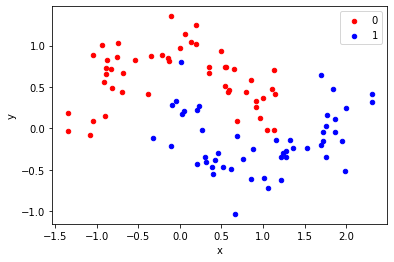

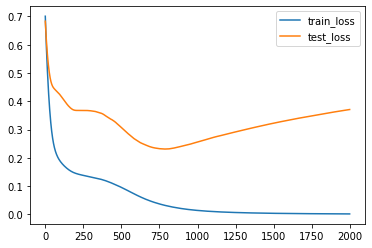

In [ ]:
show_overfitting(total_data_count=100, train_ratio=0.3)

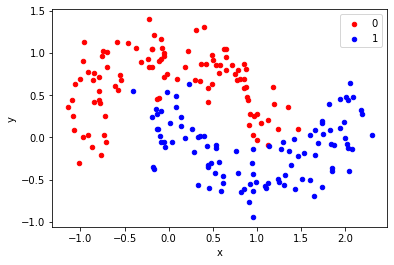

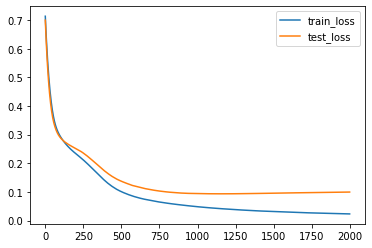

In [ ]:
show_overfitting(total_data_count=200, train_ratio=0.3)

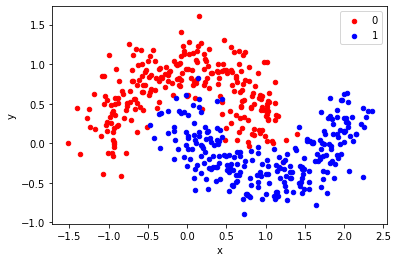

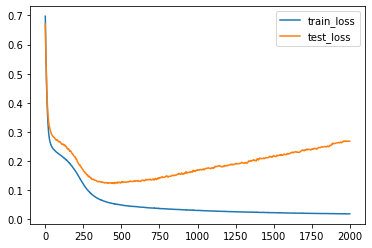

In [ ]:
show_overfitting(total_data_count=500, train_ratio=0.3)

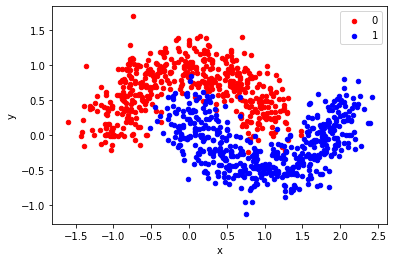

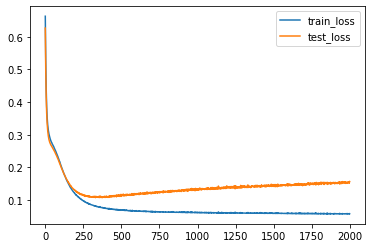

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.3)

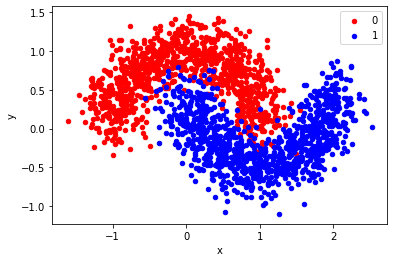

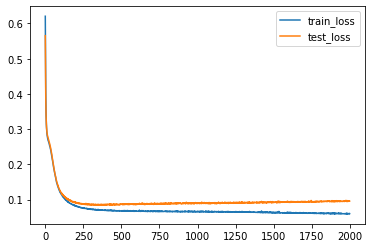

In [ ]:
show_overfitting(total_data_count=2000, train_ratio=0.3)

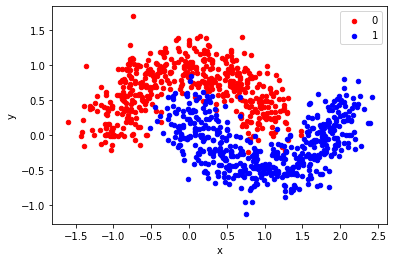

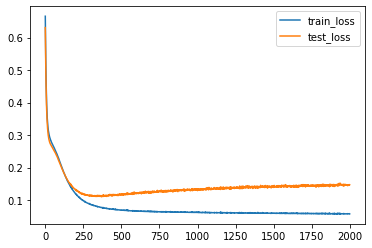

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.3)

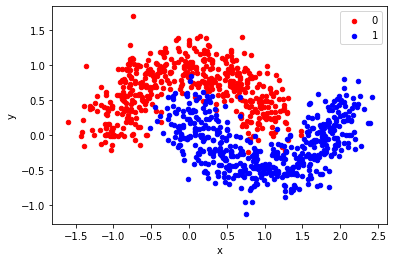

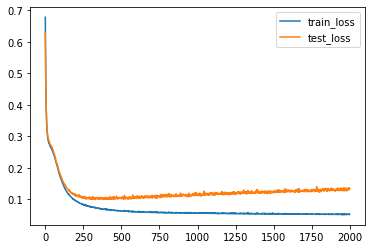

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.4)

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.5)

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.6)

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.7)

In [ ]:
show_overfitting(total_data_count=1000, train_ratio=0.8)

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/data/'

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import time

In [ ]:
def build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count):

  x1 = np.random.rand(one_count)
  x1 = x1*(square_high-square_low) + square_low

  x0 = np.random.rand(zero_count*100)
  x0 = x0[ (x0<square_low) | (square_high<x0) ]
  x0 = x0[:zero_count]

  x = np.append(x1, x0)

  plt.hist(x)
  plt.xlim(0, 1)
  plt.show()

  # 범위 안의 것을 1, 범위 밖의 것을 0으로 하고
  all_data = np.ones((len(x),2))
  all_data[:,0] = x

  all_data[:len(x1),1] = 1
  all_data[len(x1):,1] = 0

  # 섞는다
  np.random.shuffle(all_data)

  # x, y로 분리하고
  x = all_data[:,0]
  y = all_data[:,1]

  plt.xlim(0, 1)

  plt.scatter(x, y)

  return x, y

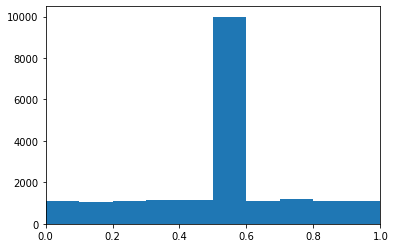

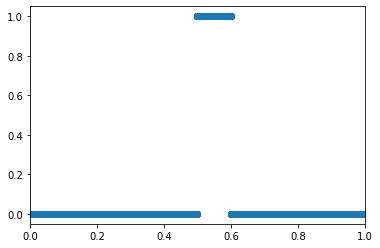

In [ ]:
all_low = 0
all_high = 1
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2490 - val_loss: 0.2488
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2486 - val_loss: 0.2484
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2482 - val_loss: 0.2481
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2478 - val_loss: 0.2477
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2474 - val_loss: 0.2473
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2470 - val_loss: 0.2469
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2466 - val_loss: 0.2464
Epoch 8/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2461 - val_loss: 0.2459
Epoch 9/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2455 - val_loss: 0.2452
Epoch 10/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2446 - val_lo

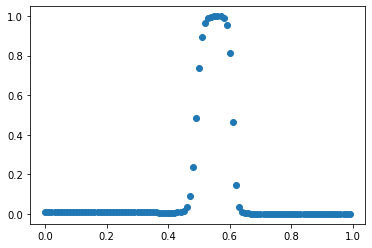

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_)

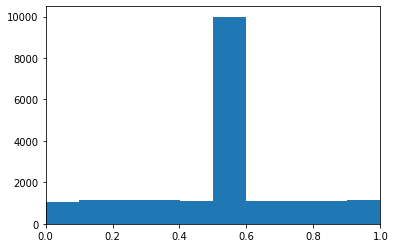

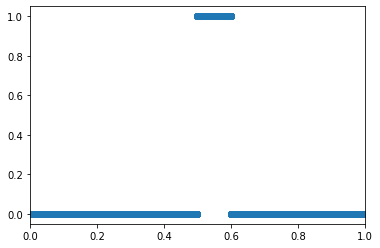

In [ ]:
all_low = 0
all_high = 1
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

In [ ]:
# ADD START
reshaped_y = train_y.reshape((train_y.shape[0],1))
train_y = np.append(reshaped_y, reshaped_y, axis=1)
train_y[:,1] = 1-train_y[:,0]
# ADD END

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2686 - val_loss: 0.2523
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2502 - val_loss: 0.2489
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2479 - val_loss: 0.2468
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2455 - val_loss: 0.2439
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2419 - val_loss: 0.2394
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2356 - val_loss: 0.2311
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2238 - val_loss: 0.2145
Epoch 8/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1960 - val_loss: 0.1738
Epoch 9/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1443 - val_loss: 0.1170
Epoch 10/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0929 - val_lo

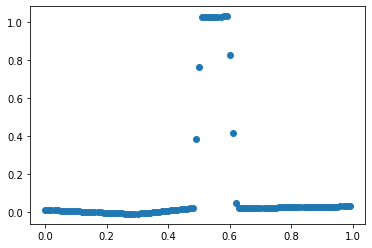

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_[:,0])

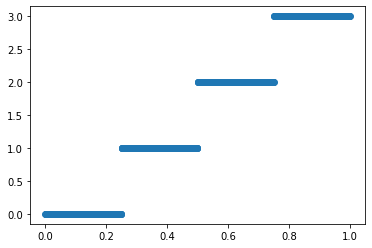

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [ ]:
train_x = np.arange(0, 1, 0.001)

class_index = np.zeros_like(train_x, dtype=np.int)
class_index[:250] = 0
class_index[250:500] = 1
class_index[500:750] = 2
class_index[750:] = 3


plt.scatter(train_x, class_index)
plt.show()

train_y = np.zeros((1000, 4))
train_y[np.arange(1000), class_index] = 1 # one-hot 인코딩

print(train_y[245:255])

Epoch 1/100
900/900 [==============================] - 2s 2ms/step - loss: 0.1746 - val_loss: 0.1425
Epoch 2/100
900/900 [==============================] - 1s 2ms/step - loss: 0.1330 - val_loss: 0.0748
Epoch 3/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1096 - val_loss: 0.0485
Epoch 4/100
900/900 [==============================] - 1s 1ms/step - loss: 0.1000 - val_loss: 0.0790
Epoch 5/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0927 - val_loss: 0.0763
Epoch 6/100
900/900 [==============================] - 1s 2ms/step - loss: 0.0863 - val_loss: 0.0514
Epoch 7/100
900/900 [==============================] - 1s 2ms/step - loss: 0.0823 - val_loss: 0.0726
Epoch 8/100
900/900 [==============================] - 1s 1ms/step - loss: 0.0792 - val_loss: 0.0580
Epoch 9/100
900/900 [==============================] - 1s 2ms/step - loss: 0.0766 - val_loss: 0.1140
Epoch 10/100
900/900 [==============================] - 1s 2ms/step - loss: 0.0745 - val_lo

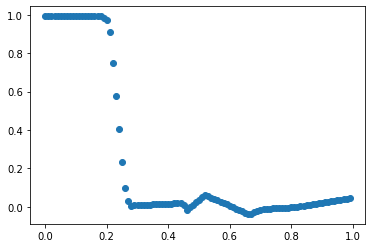

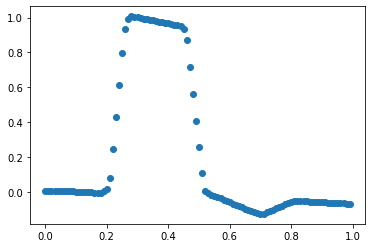

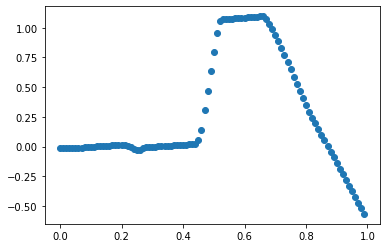

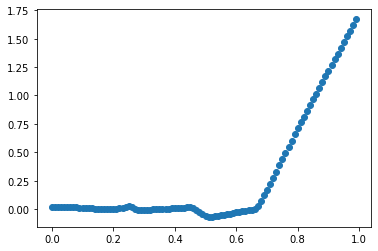

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4))

model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=1, validation_split=0.1)

x_ = np.arange(0, 1, 0.01)
y_ = model.predict(x_)
for i in range(4):
  plt.scatter(x_, y_[:,i])
  plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [ ]:
iris_filepath = '{}{}'.format(ROOT_PATH, "iris.csv")

iris = pd.read_csv(iris_filepath)
iris.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   setosa         120 non-null    int64  
 5   versicolor     120 non-null    int64  
 6   virginica      120 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 6.7 KB


In [ ]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 7)
[[6.4 2.8 5.6 2.2 0.  0.  1. ]
 [5.  2.3 3.3 1.  0.  1.  0. ]
 [4.9 2.5 4.5 1.7 0.  0.  1. ]
 [4.9 3.1 1.5 0.1 1.  0.  0. ]
 [5.7 3.8 1.7 0.3 1.  0.  0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs=200, verbose=0)

In [ ]:
loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)

20/20 [==============================] - 0s 1ms/sample - loss: 0.1346 - acc: 1.0000
loss : 0.1345616579055786
acc : 1.0


In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.6387237e-01 3.5961349e-02 1.6629745e-04]
 [8.1284530e-02 7.8967100e-01 1.2904444e-01]
 [9.2928219e-01 6.9919437e-02 7.9835742e-04]
 [3.7309993e-02 8.1337041e-01 1.4931956e-01]
 [9.7029513e-01 2.9615294e-02 8.9564906e-05]
 [9.7162408e-01 2.8290438e-02 8.5507396e-05]
 [9.7721487e-01 2.2736579e-02 4.8522106e-05]
 [9.7480291e-01 2.5132788e-02 6.4292246e-05]
 [6.2418606e-02 8.2961541e-01 1.0796599e-01]
 [9.6809489e-01 3.1781372e-02 1.2368547e-04]
 [4.5383241e-04 3.0524808e-01 6.9429809e-01]
 [1.6888408e-02 7.4740887e-01 2.3570277e-01]
 [9.6534717e-01 3.4506474e-02 1.4637473e-04]
 [1.6384244e-06 4.1733660e-02 9.5826471e-01]
 [9.6342301e-01 3.6461592e-02 1.1539022e-04]
 [5.8367369e-03 5.9726530e-01 3.9689797e-01]
 [2.3385998e-02 8.0137950e-01 1.7523454e-01]
 [9.6140826e-01 3.8383093e-02 2.0873416e-04]
 [9.6369827e-01 3.6133807e-02 1.6796218e-04]
 [5.3363174e-02 7.9664016e-01 1.4999668e-01]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


In [ ]:
iris_cat_filepath = '{}{}'.format(ROOT_PATH, "iris_with_category_index.csv")

iris = pd.read_csv(iris_cat_filepath)
iris.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100, 1)
(20, 4)
(20, 1)


In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax")) # 1이 아니고 클래스 수 3이다

# model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
20/20 [==============================] - 0s 1ms/sample - loss: 0.0587 - acc: 0.9500
loss= 0.05866814777255058
acc= 0.95


In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.98867035e-01 1.13296660e-03 4.04953688e-08]
 [1.08281495e-02 9.80627477e-01 8.54438730e-03]
 [9.96375382e-01 3.62412445e-03 4.56590328e-07]
 [2.90615181e-03 9.90655243e-01 6.43854355e-03]
 [9.98628736e-01 1.37127645e-03 3.69039519e-08]
 [9.99456704e-01 5.43320260e-04 8.84291218e-09]
 [9.99563873e-01 4.36159549e-04 4.76788520e-09]
 [9.99426126e-01 5.73900121e-04 9.80991022e-09]
 [5.77931385e-03 9.88532782e-01 5.68786962e-03]
 [9.98279929e-01 1.72001461e-03 6.67975186e-08]
 [7.15982242e-06 6.16603792e-01 3.83389056e-01]
 [8.12424347e-04 9.74694610e-01 2.44929772e-02]
 [9.98498201e-01 1.50178128e-03 4.99516624e-08]
 [1.51881813e-10 8.28601234e-03 9.91714001e-01]
 [9.98265803e-01 1.73424184e-03 5.56632749e-08]
 [1.91975458e-04 9.10148919e-01 8.96590948e-02]
 [1.01515581e-03 9.82761323e-01 1.62234977e-02]
 [9.97722685e-01 2.27714074e-03 1.69411479e-07]
 [9.98904586e-01 1.09543325e-03 4.04648475e-08]
 [6.18953304e-03 9.87421155e-01 6.38925098e-03]]
[0 1 0 1 0 0 0 0 1 0 1 1 0 2 0 1 1 0 0 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print(raw_train_x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

5


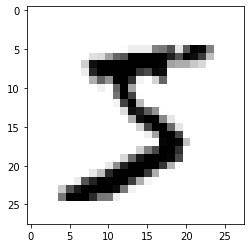

0


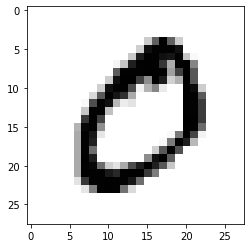

4


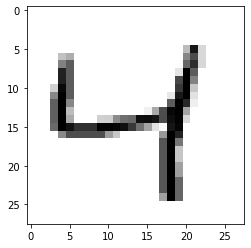

1


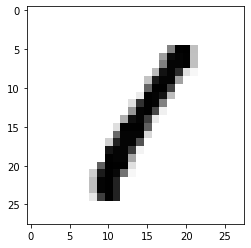

In [ ]:
for i in range(4):
  print(raw_train_y[i])
  plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
  plt.show()

In [ ]:
print(np.max(raw_train_x[:,]))
print(np.max(raw_test_x[:,]))

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))
print(np.max(test_x[:,]))

255
255
1.0
1.0


In [ ]:
print(train_x.shape)

(60000, 28, 28)


In [ ]:
data_count = train_x.shape[0]
data_size = train_x.shape[1]*train_x.shape[2]
train_x = train_x.reshape((data_count, data_size))

data_count = test_x.shape[0]
test_x = test_x.reshape((data_count, data_size))

print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


In [ ]:
model = keras.Sequential()
# model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
# model.add(Dense(3, activation='softmax'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# start_time = time.time() # REMOVED
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
# print("elapsed : {}".format(time.time() - start_time)) # REMOVED

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.9048 - acc: 0.7329
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3742 - acc: 0.8957
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3192 - acc: 0.9096
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2908 - acc: 0.9180
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2737 - acc: 0.9230


In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.2722 - acc: 0.9197
loss= 0.2721735099896789
acc= 0.9197


[[6.6630557e-05 8.3175559e-07 2.5571876e-03 ... 9.9461490e-01
  2.9166168e-07 3.0615495e-04]
 [8.6471737e-06 9.1778844e-07 9.9462199e-01 ... 1.8773375e-06
  2.2128132e-05 5.3871335e-10]
 [1.2463087e-06 9.7806555e-01 7.1714404e-03 ... 1.0153826e-02
  1.7385972e-03 1.6892509e-04]
 ...
 [5.0335319e-07 2.3257476e-07 7.4667805e-06 ... 9.5426749e-06
  7.3931715e-03 4.7383714e-03]
 [8.3070017e-06 5.5704067e-08 2.1324522e-06 ... 2.4219923e-07
  3.7160902e-03 2.6865946e-06]
 [2.7705044e-06 2.4684507e-10 5.6596647e-08 ... 1.7163595e-08
  7.6865545e-09 1.7888298e-10]]
[7 2 1 ... 4 5 6]
7


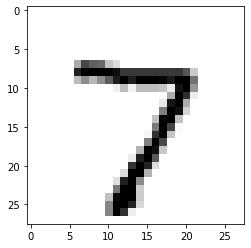

2


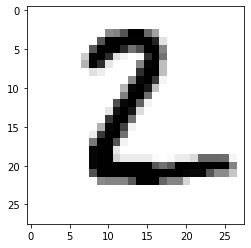

1


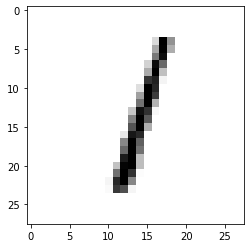

0


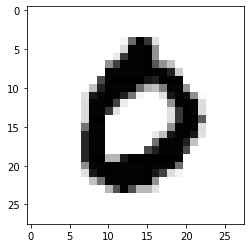

In [ ]:
y_ = model.predict(test_x)
print(y_)
predicted = np.argmax(y_, axis=1)
print(predicted)

for i in range(4):
  print(predicted[i])
  plt.imshow(raw_test_x[i], cmap=plt.cm.binary)
  plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

train_x = train_x.reshape((60000, 28*28))
test_x = test_x.reshape((10000, 28*28))

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.9230 - acc: 0.7261
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3679 - acc: 0.8979
Epoch 3/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3083 - acc: 0.9123
Epoch 4/5
60000/60000 [==============================] -

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

# data_count = train_x.shape[0] # COMMENT OUT
# data_size = train_x.shape[1]*train_x.shape[2] # COMMENT OUT
# train_x = train_x.reshape((data_count, data_size)) # COMMENT OUT

# data_count = test_x.shape[0] # COMMENT OUT
# test_x = test_x.reshape((data_count, data_size)) # COMMENT OUT

In [ ]:
model = keras.Sequential()
model.add(Input((28,28)))  # ADD
model.add(Flatten())       # ADD
# model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.9170 - acc: 0.7066
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3675 - acc: 0.8961
Epoch 3/5
60000/60000 [==

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x/255
test_x = test_x/255


model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 1.0141 - acc: 0.6809
Epoch 2/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3750 - acc: 0.8942
Epoch 3/5
60000/60000 [==

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 17us/sample - loss: 3.6367 - acc: 0.2091
Epoch 2/5
60000/60000 [==============================] - 1s 16us/sample - loss: 1.8255 - acc: 0.3218
Epoch 3/5
60000/60000 [=

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/127.5 - 1
test_x = test_x/127.5 - 1

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.9968 - acc: 0.6789
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4671 - acc: 0.8616
Epoch 3/5
60000/60000 [=

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x*2 - 255
test_x = test_x*2 - 255

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 19us/sample - loss: 3.1140 - acc: 0.1169
Epoch 2/5
60000/60000 [==============================] - 1s 18us/sample - loss: 2.0859 - acc: 0.2031
Epoch 3/5
60000/60000 [=

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/255/2
test_x = test_x/255/2

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_44 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 1.0138 - acc: 0.7103
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.4482 - acc: 0.8737
Epoch 3/5
60000/60000 [=

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/255*2
test_x = test_x/255*2

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_46 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_47 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 22us/sample - loss: 0.8822 - acc: 0.7233
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3654 - acc: 0.8960
Epoch 3/5
60000/60000 [=

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

# Conv2D는 width*height*channel을 입력으로 받음
train_x = train_x.reshape((60000, 28, 28, 1)) # ADDED
test_x = test_x.reshape((10000, 28, 28, 1)) # ADDED

train_y = raw_train_y
test_y = raw_test_y

In [ ]:
# 실습 시에는 시간 관계로 일부만 사용한다.
train_x = train_x[:10000] # ADDED
train_y = train_y[:10000] # ADDED

In [ ]:
model = keras.Sequential()
# model.add(Input((28,28)))
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Conv2D(64, (3, 3))) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)                16010     
_________________________________________________________________
dense_49 (Dense)             (None, 10)              

In [ ]:
# (raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)


train_x = raw_train_x/255
test_x = raw_test_x/255

# train_x = train_x.reshape((60000, 28, 28, 1)) # COMMENT OUT
# test_x = test_x.reshape((10000, 28, 28, 1)) # COMMENT OUT

train_y = raw_train_y
test_y = raw_test_y

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


9 truck


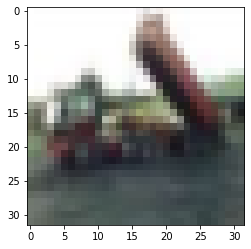

4 deer


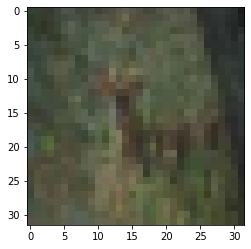

7 horse


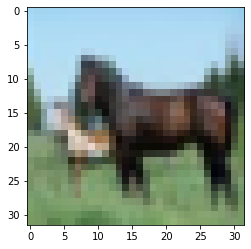

9 truck


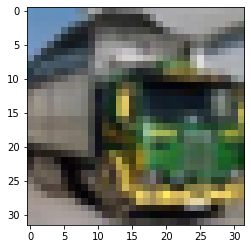

In [ ]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_sample(i):
  print(raw_train_y[i][0], labels[raw_train_y[i][0]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [ ]:
# 실습 시에는 시간 관계로 일부만 사용한다.
train_x = train_x[:10000] # ADDED
train_y = train_y[:10000] # ADDED

In [ ]:
model = keras.Sequential()
# model.add(Input((28,28,1)))
model.add(Input((32,32,3)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 10)                23050     
_________________________________________________________________
dense_55 (Dense)             (None, 10)              

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
train_x = train_x[:10000]
train_y = train_y[:10000]

In [ ]:
# ADDED START
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, # 0 ~ 180
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=False 
)
# ADDED END

In [ ]:
model = keras.Sequential()
model.add(Input((32,32,3)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
model.fit_generator(datagen.flow(train_x, train_y, batch_size=128), epochs=5)



loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)                23050     
_________________________________________________________________
dense_58 (Dense)             (None, 10)              

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
# from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Conv1D, Flatten

In [ ]:
iris_cat_filepath = '{}{}'.format(ROOT_PATH, "iris_with_category_index.csv")

iris = pd.read_csv(iris_cat_filepath)
iris.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

train_x = np.reshape(train_x, (100, 4, 1))  # ADD
test_x = np.reshape(test_x, (20, 4, 1))     # ADD

print(train_x.shape)  # ADD
print(test_x.shape)   # ADD

(100, 4)
(100, 1)
(20, 4)
(20, 1)
(100, 4, 1)
(20, 4, 1)


In [ ]:
model = keras.Sequential()
model.add(Conv1D(4, 3, activation='relu', input_shape=(4,1))) # ADD
model.add(Flatten())  # ADD
# model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu')) # modify
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax")) # 1이 아니고 클래스 수 3이다

model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2, 4)              16        
_________________________________________________________________
flatten_13 (Flatten)         (None, 8)                 0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_61 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 33        
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________
20/20 [==============================] - 0s 5ms/sample - loss: 0.0222 - acc: 1.0000
loss= 0.022211965173482895
acc= 1.0


In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.9885845e-01 1.1416103e-03 3.8783343e-12]
 [8.8471249e-03 9.9099696e-01 1.5591075e-04]
 [9.9839371e-01 1.6063001e-03 6.1879495e-11]
 [9.1618788e-04 9.9891126e-01 1.7260031e-04]
 [9.9866128e-01 1.3387582e-03 2.5490758e-12]
 [9.9937481e-01 6.2520633e-04 4.8987073e-13]
 [9.9928844e-01 7.1154081e-04 2.4928865e-13]
 [9.9897003e-01 1.0300287e-03 8.5082603e-13]
 [7.4106553e-03 9.9253005e-01 5.9289396e-05]
 [9.9701703e-01 2.9830318e-03 1.0978239e-11]
 [6.5510710e-07 2.8455481e-01 7.1544456e-01]
 [4.3987361e-04 9.9844521e-01 1.1149460e-03]
 [9.9830663e-01 1.6933000e-03 4.7618715e-12]
 [1.4179411e-08 3.2594066e-02 9.6740592e-01]
 [9.9904531e-01 9.5462753e-04 2.1468710e-12]
 [3.4122473e-05 9.6473342e-01 3.5232417e-02]
 [4.3911856e-04 9.9914634e-01 4.1450802e-04]
 [9.9657792e-01 3.4220582e-03 4.3379470e-11]
 [9.9835086e-01 1.6491705e-03 5.7105544e-12]
 [2.9221165e-03 9.9687141e-01 2.0650393e-04]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)


train_x = raw_train_x/255
test_x = raw_test_x/255

# train_x = train_x.reshape((60000, 28, 28, 1)) # COMMENT OUT
# test_x = test_x.reshape((10000, 28, 28, 1)) # COMMENT OUT

train_y = raw_train_y
test_y = raw_test_y

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


9 truck


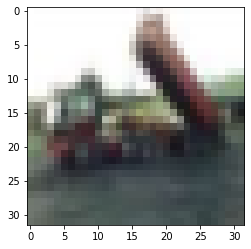

4 deer


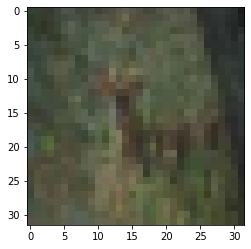

7 horse


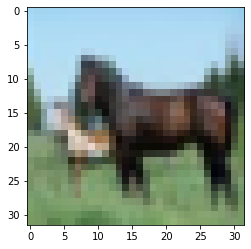

9 truck


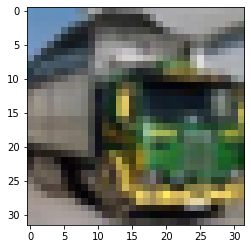

In [ ]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_sample(i):
  print(raw_train_y[i][0], labels[raw_train_y[i][0]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, # 0 ~ 180
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=False 
)

In [ ]:
train_x = train_x[:1000]
train_y = train_y[:1000]

In [ ]:
BATCH_SIZE = 128
iterator = datagen.flow(train_x, train_y, batch_size=BATCH_SIZE)

In [ ]:
data_count = len(train_x)
print("data_count :", data_count)

WANTED_MULTIPLE_COUNT = 2
print("WANTED_MULTIPLE_COUNT :", WANTED_MULTIPLE_COUNT)

STEP_COUNT = int(data_count/BATCH_SIZE)+1
print("STEP_COUNT :", STEP_COUNT)

FETCH_COUNT = STEP_COUNT*WANTED_MULTIPLE_COUNT
print("FETCH_COUNT :", FETCH_COUNT)


augmented_x_list = []
augmented_y_list = []
for i in range(FETCH_COUNT):
  item = next(iterator)
  augmented_x, augmented_y = item
  augmented_x_list.extend(augmented_x)
  augmented_y_list.extend(augmented_y)
  # print(len(augmented_x_list))
# python list를 numpy로 변환
augmented_train_x = np.array(augmented_x_list)
augmented_train_y = np.array(augmented_y_list)

print(augmented_train_x.shape)
print(augmented_train_y.shape)

data_count : 1000
WANTED_MULTIPLE_COUNT : 2
STEP_COUNT : 8
FETCH_COUNT : 16
(2000, 32, 32, 3)
(2000, 1)


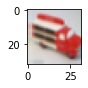

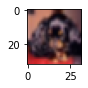

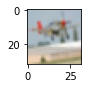

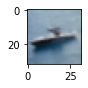

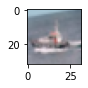

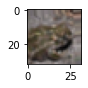

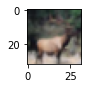

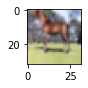

In [ ]:
for i in [0,2,4,6,8,10,12,14]:
  plt.figure(figsize=(1,1))
  plt.imshow(augmented_train_x[i])
  plt.show()

In [ ]:
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

def my_preprocess_input(image):
  return image/255

BATCH_SIZE = 128

data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=my_preprocess_input
)

dogs_filepath = '{}{}'.format(ROOT_PATH, "dogs")

iterator = data_aug_generator.flow_from_directory(
      dogs_filepath,
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

Found 162 images belonging to 10 classes.


In [ ]:
data_count = len(iterator.labels)
print("data_count :", data_count)

WANTED_MULTIPLE_COUNT = 2
print("WANTED_MULTIPLE_COUNT :", WANTED_MULTIPLE_COUNT)

STEP_COUNT = int(data_count/BATCH_SIZE)+1
print("STEP_COUNT :", STEP_COUNT)

FETCH_COUNT = STEP_COUNT*WANTED_MULTIPLE_COUNT
print("FETCH_COUNT :", FETCH_COUNT)

augmented_x_list = []
augmented_y_list = []
for i in range(FETCH_COUNT):
  item = next(iterator)
  augmented_x, augmented_y = item
  augmented_x_list.extend(augmented_x)
  augmented_y_list.extend(augmented_y)

# python list를 numpy로 변환
augmented_train_x = np.array(augmented_x_list)
augmented_train_y = np.array(augmented_y_list)

print(augmented_train_x.shape)
print(augmented_train_y.shape)

data_count : 162
WANTED_MULTIPLE_COUNT : 2
STEP_COUNT : 2
FETCH_COUNT : 4
(324, 224, 224, 3)
(324,)


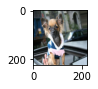

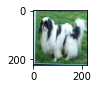

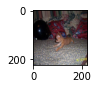

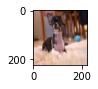

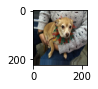

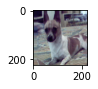

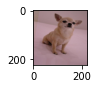

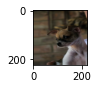

In [ ]:
for i in [0,2,4,6,8,10,12,14]:
  plt.figure(figsize=(1,1))
  plt.imshow(augmented_train_x[i])
  plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(x_train, _), (x_test, _) = mnist.load_data()

# Normalization (정규화)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flattening (평활화)
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

In [ ]:
noise = np.random.normal(loc=0.0, scale=1.0, size=10000)

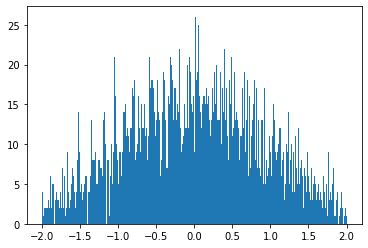

In [ ]:
plt.hist(noise, bins=1000, range=(-2., 2.))
plt.show()

In [ ]:
# 원본데이터에 Noise 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# 최대가 1, 최소가 0이 되도록 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

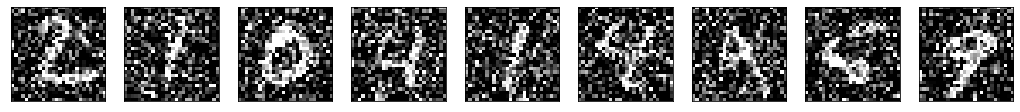

In [ ]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(x_train_noisy, x_train, 
          epochs=100,
          batch_size=256,
          shuffle=True,
          validation_data=(x_test_noisy, x_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2726 - val_loss: 0.2124
Epoch 2/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1874 - val_loss: 0.1721
Epoch 3/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1669 - val_loss: 0.1609
Epoch 4/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1579 - val_loss: 0.1537
Epoch 5/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1521 - val_loss: 0.1488
Epoch 6/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1468 - val_loss: 0.1439
Epoch 7/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1425 - val_loss: 0.1401
Epoch 8/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1394 - val_loss:

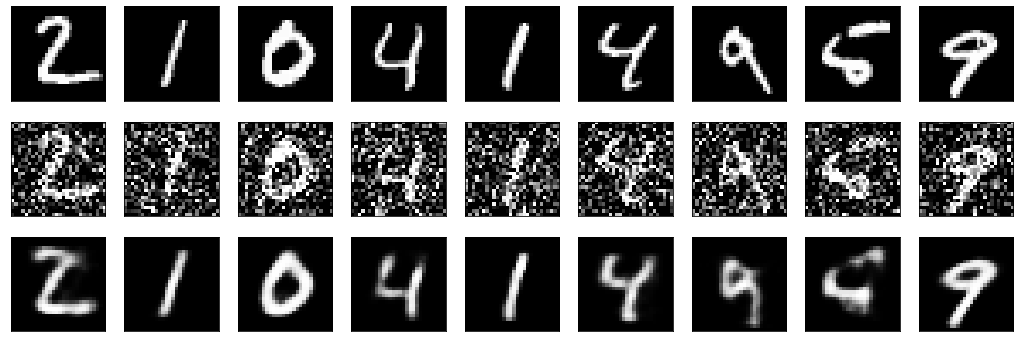

In [ ]:
decoded_imgs = model.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 첨가 된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 제거 된 것
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# 데이터 정규화 및 Reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
def shrink(data, rows, cols):
    return data.reshape(data.shape[0], rows, int(data.shape[1]/rows), cols, int(data.shape[2]/cols)).sum(axis=2).sum(axis=3)

reduced_x_train = shrink(x_train, 14, 14)
reduced_x_test = shrink(x_test, 14, 14)
print(reduced_x_train.shape)
print(reduced_x_test.shape)

(60000, 14, 14)
(10000, 14, 14)


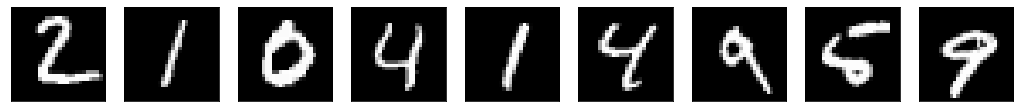

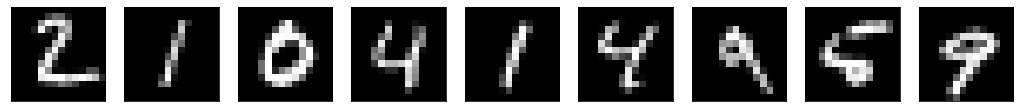

In [ ]:
n = 10

plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 해상도 낮아진 이미지 확인
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(reduced_x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
reduced_x_train = reduced_x_train.reshape(reduced_x_train.shape[0], 14*14)
reduced_x_test = reduced_x_test.reshape(reduced_x_test.shape[0], 14*14)
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

In [ ]:
print(reduced_x_train.shape)
print(x_train.shape)
print(reduced_x_test.shape)
print(x_test.shape)

(60000, 196)
(60000, 784)
(10000, 196)
(10000, 784)


In [ ]:
# 모델 정의
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=14*14))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
# model.add(Dense(784))

model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(reduced_x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 2s 33us/sample - loss: 0.0598 - val_loss: 0.0338
Epoch 2/50
54000/54000 [==============================] - 1s 14us/sample - loss: 0.0288 - val_loss: 0.0245
Epoch 3/50
54000/54000 [==============================] - 1s 14us/sample - loss: 0.0223 - val_loss: 0.0202
Epoch 4/50
54000/54000 [==============================] - 1s 14us/sample - loss: 0.0190 - val_loss: 0.0179
Epoch 5/50
54000/54000 [==============================] - 1s 15us/sample - loss: 0.0171 - val_loss: 0.0163
Epoch 6/50
54000/54000 [==============================] - 1s 15us/sample - loss: 0.0158 - val_loss: 0.0152
Epoch 7/50
54000/54000 [==============================] - 1s 14us/sample - loss: 0.0149 - val_loss: 0.0144
Epoch 8/50
54000/54000 [==============================] - 1s 15us/sample - loss: 0.0142 - val_loss: 0.0138
Epoch 9/50
54000/54000 [==============================] - 1s 14us/sample - loss: 0.0137 - val_l

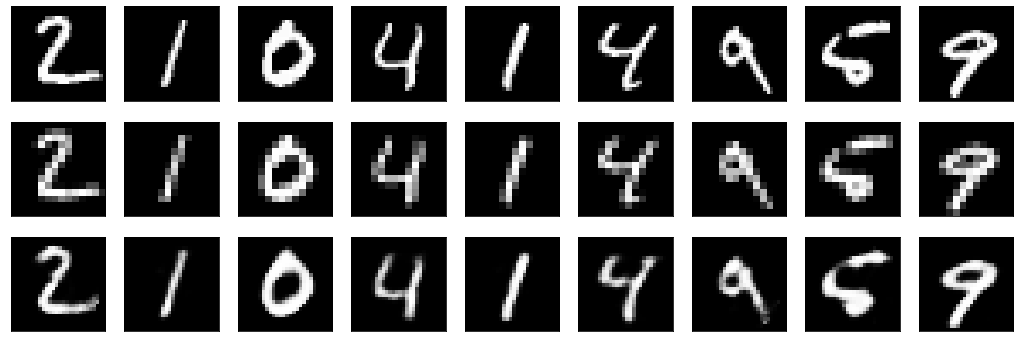

In [ ]:
# 결과 확인
super_resolutioned = model.predict(reduced_x_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reduced
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reduced_x_test[i].reshape(14,14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display super resolution
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(super_resolutioned[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
%tensorflow_version 1.x

In [ ]:
%%shell
rm -rf imagenet
mkdir imagenet

# 버섯
wget -O imagenet/mushroom1.jpg http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
wget -O imagenet/mushroom2.jpg http://farm3.static.flickr.com/2416/1593642808_efcef6c9c2.jpg
wget -O imagenet/mushroom3.jpg http://farm4.static.flickr.com/3003/2536991564_5f9b2f5b53.jpg
  
# 강아지
wget -O imagenet/dog1.jpg http://farm1.static.flickr.com/58/160964915_d708f48d0d.jpg
wget -O imagenet/dog2.jpg http://farm1.static.flickr.com/51/144906086_049df05364.jpg
wget -O imagenet/dog3.jpg http://farm3.static.flickr.com/2133/2236535445_ca650757f2.jpg
  
# 고양이  
wget -O imagenet/cat1.jpg http://farm1.static.flickr.com/131/393656824_bd89c512d0.jpg
wget -O imagenet/cat2.jpg http://farm1.static.flickr.com/213/505539125_d7193beb76.jpg
wget -O imagenet/cat3.jpg http://farm1.static.flickr.com/24/63785988_c16c10b4e5.jpg

--2021-08-06 12:05:09--  http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Resolving farm4.static.flickr.com (farm4.static.flickr.com)... 99.84.192.159, 2600:9000:20c5:8400:0:5a51:64c9:c681, 2600:9000:20c5:7400:0:5a51:64c9:c681, ...
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|99.84.192.159|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg [following]
--2021-08-06 12:05:09--  https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|99.84.192.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘imagenet/mushroom1.jpg’

imagenet/mushroom1.     [ <=>                ]  59.96K  --.-KB/s    in 0.01s   

2021-08-06 12:05:10 (5.30 MB/s) - ‘imagenet/mushroom1.jpg’ saved [61397]

--2021-08-06 12:05:10--  http://farm3.static.flickr.com

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def predict_vgg16(model, filename) :

  
  # 모델 사이즈로 이미지 파일을 읽기
  image = load_img(filename, target_size=(224, 224))
  # image = PIL.Image.Image image mode=RGB size=224x224

  
  # 이미지 데이터를 numpy로 변환
  image = img_to_array(image)
  # [
  #   [[211. 184. 163.]
  #   [225. 193. 170.]
  #   ...
  #   [237. 202. 180.]]
  #   ...
  # ]  
  #
  # image.shape = (224, 224, 3)
  
  # 화면에 이미지 보여주기
  plt.imshow(image.astype(int))
  plt.show()

  # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
  # 보통 모델을 여러 이미지를 한번에 호출. 
  # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
  # 두번째 224 : 가로
  # 세번째 224 : 세로
  # 네번째 3 : R, G, B 3개
  image = image.reshape((1, 224, 224, 3))

  # VGG16 모델 호출을 위해 데이터 전처리.
  # -255 ~ 255 사이 값으로 정규화한다.
  # 그리고 RGB를 BGR순으로 바꾼다.
  image = vgg16.preprocess_input(image)
  
  
  # 이미지를 모델에 적용
  yhat = model.predict(image)
  # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
  #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
  #          ... ]] # 1000개 클래스에 대한 결과값.
  #
    
    
  # 모델 적용된 결과를 파싱
  label = vgg16.decode_predictions(yhat)
  # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

  # 가장 확률이 높은 결과를 획득
  label = label[0][0]
  # label = ('n02655020', 'puffer', 0.9612253)

  # 라벨과 라벨을 예측한 확률을 출력
  print('%s (%.2f%%)' % (label[1], label[2]*100))

553467904/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

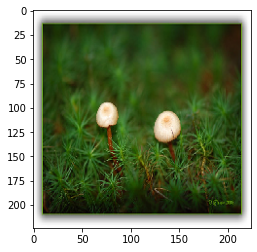

40960/35363 [==================================] - 0s 0us/step
acorn (33.70%)


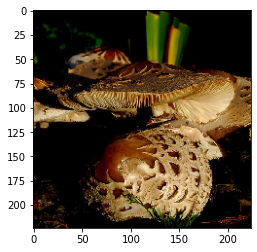

mushroom (71.41%)


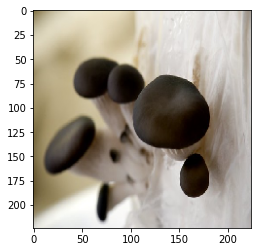

birdhouse (23.68%)


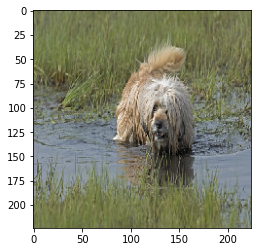

Tibetan_terrier (80.98%)


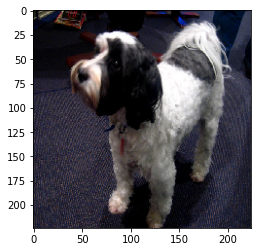

Tibetan_terrier (86.20%)


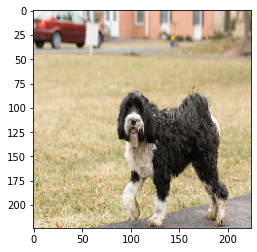

standard_poodle (23.26%)


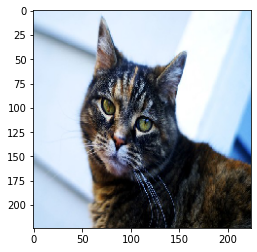

tabby (56.46%)


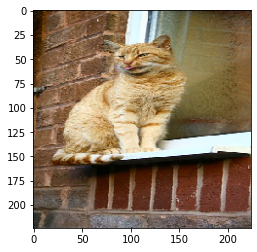

tiger_cat (39.90%)


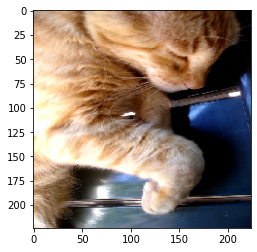

tiger_cat (18.95%)


In [ ]:
from tensorflow.keras.applications import vgg16

# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

# 테스트 할 이미지 파일들
files = [
      'imagenet/mushroom1.jpg',
      'imagenet/mushroom2.jpg',
      'imagenet/mushroom3.jpg',
      'imagenet/dog1.jpg',
      'imagenet/dog2.jpg',
      'imagenet/dog3.jpg',
      'imagenet/cat1.jpg',
      'imagenet/cat2.jpg',
      'imagenet/cat3.jpg',
    ]

# 분류 실행
for file in files :
  predict_vgg16(model, file)

In [ ]:
%%shell
rm -rf dogs.tar.gz
wget https://github.com/dhrim/hongik_2020/raw/master/material/deep_learning/dogs.tar.gz
ls -al

--2021-08-06 12:06:44--  https://github.com/dhrim/hongik_2020/raw/master/material/deep_learning/dogs.tar.gz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/hongik_2020/master/material/deep_learning/dogs.tar.gz [following]
--2021-08-06 12:06:44--  https://raw.githubusercontent.com/dhrim/hongik_2020/master/material/deep_learning/dogs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62885106 (60M) [application/octet-stream]
Saving to: ‘dogs.tar.gz’

dogs.tar.gz         100%[===================>]  59.97M   241MB/s    in 0.2s    

2021-08-06 12:06:47 (241 MB/s) - ‘dogs.tar.gz’ saved [6288

In [ ]:
%%shell
rm -rf dogs
tar xvfz dogs.tar.gz
ls -al dogs

dogs/
dogs/n02085620-Chihuahua/
dogs/n02085782-Japanese_spaniel/
dogs/n02085936-Maltese_dog/
dogs/n02086079-Pekinese/
dogs/n02086240-Shih-Tzu/
dogs/n02086646-Blenheim_spaniel/
dogs/n02086910-papillon/
dogs/n02087046-toy_terrier/
dogs/n02087394-Rhodesian_ridgeback/
dogs/n02088094-Afghan_hound/
dogs/n02088094-Afghan_hound/n02088094_1003.jpg
dogs/n02088094-Afghan_hound/n02088094_1007.jpg
dogs/n02088094-Afghan_hound/n02088094_1023.jpg
dogs/n02088094-Afghan_hound/n02088094_10263.jpg
dogs/n02088094-Afghan_hound/n02088094_10715.jpg
dogs/n02088094-Afghan_hound/n02088094_10822.jpg
dogs/n02088094-Afghan_hound/n02088094_10832.jpg
dogs/n02088094-Afghan_hound/n02088094_10982.jpg
dogs/n02088094-Afghan_hound/n02088094_11006.jpg
dogs/n02088094-Afghan_hound/n02088094_11172.jpg
dogs/n02088094-Afghan_hound/n02088094_11182.jpg
dogs/n02088094-Afghan_hound/n02088094_1126.jpg
dogs/n02088094-Afghan_hound/n02088094_1128.jpg
dogs/n02088094-Afghan_hound/n02088094_11432.jpg
dogs/n02088094-Afghan_hound/n02088094_1

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16

In [ ]:
def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir(path)
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  combined = list(zip(file_names, category_names))
  random.shuffle(combined)
  file_names, category_names = zip(*combined)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    image = img_to_array(image)
    data[i] = image
  return data


def load_custom_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names(path)
  x = load_image_files_into_numpy_array(file_names)
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels

In [ ]:
(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(custom_labels)

(1535, 224, 224, 3)
(1535,)
(384, 224, 224, 3)
(384,)
['n02085620-Chihuahua' 'n02085782-Japanese_spaniel'
 'n02085936-Maltese_dog' 'n02086079-Pekinese' 'n02086240-Shih-Tzu'
 'n02086646-Blenheim_spaniel' 'n02086910-papillon' 'n02087046-toy_terrier'
 'n02087394-Rhodesian_ridgeback' 'n02088094-Afghan_hound']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from tensorflow.keras.applications import VGG16
# 모델 불러오기
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in conv_layers.layers:
    layer.trainable = False


# 새로운 모델 생성하기
model = models.Sequential()

# VGG16모델의 Convolution Layer를 추가
model.add(conv_layers)
 
# 모델의 Fully Connected 부분을 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="RMSprop",
              metrics=['acc'])

# 모델 학습
model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True, validation_split=0.1)

Train on 1381 samples, validate on 154 samples
Epoch 1/10
1381/1381 [==============================] - 17s 13ms/sample - loss: 158.6168 - acc: 0.5590 - val_loss: 10.3054 - val_acc: 0.8117
Epoch 2/10
1381/1381 [==============================] - 8s 6ms/sample - loss: 7.7587 - acc: 0.8588 - val_loss: 8.4003 - val_acc: 0.8247
Epoch 3/10
1381/1381 [==============================] - 8s 6ms/sample - loss: 3.8220 - acc: 0.9102 - val_loss: 23.0674 - val_acc: 0.6753
Epoch 4/10
1381/1381 [==============================] - 8s 6ms/sample - loss: 5.4055 - acc: 0.9044 - val_loss: 12.0218 - val_acc: 0.8182
Epoch 5/10
1381/1381 [==============================] - 8s 6ms/sample - loss: 4.3552 - acc: 0.9254 - val_loss: 10.4208 - val_acc: 0.8377
Epoch 6/10
1381/1381 [==============================] - 8s 6ms/sample - loss: 3.3944 - acc: 0.9341 - val_loss: 10.9576 - val_acc: 0.8377
Epoch 7/10
1381/1381 [==============================] - 8s 6ms/sample - loss: 3.1443 - acc: 0.9450 - val_loss: 13.2084 - val_acc

384/384 [==============================] - 4s 11ms/sample - loss: 10.9494 - acc: 0.8646
loss = 10.949358423550924
acc = 0.8645833
4 n02086240-Shih-Tzu
4 n02086240-Shih-Tzu


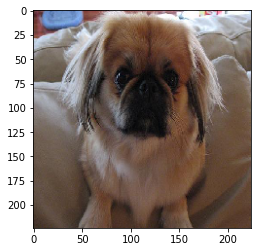

6 n02086910-papillon
6 n02086910-papillon


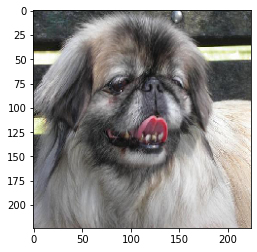

1 n02085782-Japanese_spaniel
1 n02085782-Japanese_spaniel


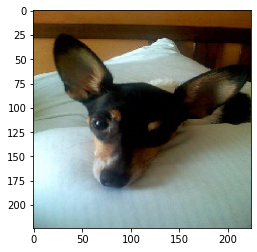

5 n02086646-Blenheim_spaniel
5 n02086646-Blenheim_spaniel


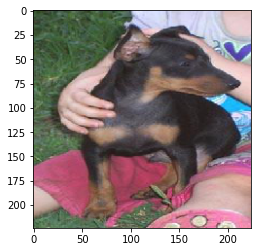

9 n02088094-Afghan_hound
9 n02088094-Afghan_hound


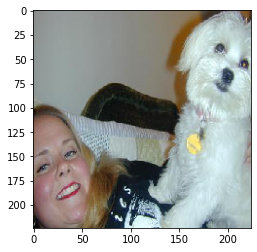

In [ ]:
import matplotlib.pyplot as plt

loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)

predicted = np.argmax(y_, axis=1)


# train_x, test_x는 vgg16.prerprocess_input()에 의해 변형되었다.
(_, _), (raw_test_x, _), custom_labels = load_custom_data("dogs")


for i in [0,50,100,150,200]:  
  print(test_y[i], custom_labels[test_y[i]])
  print(predicted[i], custom_labels[predicted[i]])
  plt.imshow(raw_test_x[i].astype(int))
  plt.show()

In [ ]:
def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir(path)
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    image = img_to_array(image)
    data[i] = image
  return data


def load_custom_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names(path)
  x = load_image_files_into_numpy_array(file_names)
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16

conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)


model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)


loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])

Train on 1535 samples
Epoch 1/10
1535/1535 [==============================] - 12s 8ms/sample - loss: 128.8380 - acc: 0.6391
Epoch 2/10
1535/1535 [==============================] - 8s 5ms/sample - loss: 8.9010 - acc: 0.8964
Epoch 3/10
1535/1535 [==============================] - 8s 5ms/sample - loss: 7.0911 - acc: 0.9127
Epoch 4/10
1535/1535 [==============================] - 8s 5ms/sample - loss: 4.9469 - acc: 0.9336
Epoch 5/10
1535/1535 [==============================] - 8s 5ms/sample - loss: 4.1515 - acc: 0.9577
Epoch 6/10
1535/1535 [==============================] - 8s 5ms/sample - loss: 4.3031 - acc: 0.9485
Epoch 7/10
1535/1535 [==============================] - 8s 5ms/sample - loss: 3.8242 - acc: 0.9622
Epoch 8/10
1535/1535 [==============================] - 8s 5ms/sample - loss: 2.7276 - acc: 0.9746
Epoch 9/10
1535/1535 [==============================] - 8s 5ms/sample - loss: 3.3693 - acc: 0.9700
Epoch 10/10
384/384 [==============================] - 2s 6ms/sample - loss: 688.322

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16



conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

# ADD START
data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input # 여기에 preprocess 함수를 설정
)
# ADD END
 

#model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit_generator(
    data_aug_generator.flow(train_x, train_y, batch_size=64),
    steps_per_epoch=train_x.shape[0]/64, # data_size / batch_size
    epochs=10)


loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])

Epoch 1/10
24/23 [==============================] - 18s 764ms/step - loss: 134.4646 - acc: 0.6085
Epoch 2/10
24/23 [==============================] - 18s 742ms/step - loss: 13.2886 - acc: 0.8195
Epoch 3/10
24/23 [==============================] - 18s 739ms/step - loss: 6.9415 - acc: 0.8678
Epoch 4/10
24/23 [==============================] - 17s 706ms/step - loss: 6.3103 - acc: 0.8704
Epoch 5/10
24/23 [==============================] - 17s 696ms/step - loss: 4.5652 - acc: 0.8886
Epoch 6/10
24/23 [==============================] - 18s 750ms/step - loss: 5.3610 - acc: 0.8886
Epoch 7/10
24/23 [==============================] - 18s 737ms/step - loss: 3.1338 - acc: 0.9251
Epoch 8/10
24/23 [==============================] - 17s 699ms/step - loss: 3.6161 - acc: 0.9101
Epoch 9/10
24/23 [==============================] - 17s 711ms/step - loss: 3.3980 - acc: 0.9199
Epoch 10/10
384/384 [==============================] - 2s 6ms/sample - loss: 255.4453 - acc: 0.0443
loss = 255.44534301757812
acc = 0

In [ ]:
%%shell
rm -rf dogs_prepared.tar.gz
wget https://github.com/dhrim/hongik_2020/raw/master/material/deep_learning/dogs_prepared.tar.gz
ls -al

In [ ]:
%%shell
rm -rf dogs_prepared
tar xvfz dogs_prepared.tar.gz
ls -al dogs_prepared

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


# (train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
# test_x = vgg16.preprocess_input(test_x)

# ADD START
data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
)

data_no_aug_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
)

train_data_generator = data_aug_generator.flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = data_no_aug_generator.flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      class_mode='sparse'
)
# ADD END
 

#model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/64, # data_size / batch_size    
      epochs=10
)


# y_ = model.predict(test_x)
y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
)

data_no_aug_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
)

train_data_generator = data_aug_generator.flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = data_no_aug_generator.flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/64,  
      validation_steps=test_data_generator.samples/64,      
      epochs=10
)


y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import ResNet50


# conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
)

data_no_aug_generator = ImageDataGenerator(
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
)

train_data_generator = data_aug_generator.flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = data_no_aug_generator.flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      validation_steps=5,
      steps_per_epoch=train_data_generator.samples/64,
      epochs=10
)


y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])